In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import sys
sys.maxsize

%matplotlib inline

In [2]:
df = pd.read_csv('DivarCsv.csv', encoding='utf-32') 
df = pd.DataFrame(df)

,Title,Meterage,YearConstruction,NumberOfRooms,HasElevator,HasParking,HasWarehouse,Floor,Neighborhood,TotalPrice,PricePerMeterage,URL
0,۴۲متر/خوش‌نقشه/سرمایه‌گذاری‌قرن/منطقه۱۰,42,1380,1,0,0,1,3,بریانک,1090000000,25952000,https://divar.ir/v/۴۲متر-خوش-نقشه-سرمایه-گذاری...
1,(۶۴ متر دو خواب/ فول دیزاین شهران/بدون مشرف),64,1385,2,0,1,1,1,شهران جنوبی,3380000000,52812000,https://divar.ir/v/۶۴-متر-دو-خواب-فول-دیزاین-ش...
2,56 متر در حوالی فلکه دوم صادقیه,56,1381,1,0,0,0,1,صادقیه,2480000000,44285000,https://divar.ir/v/56-متر-در-حوالی-فلکه-دوم-صا...
3,84 متر در فردوس شرق,84,1392,2,1,1,1,3,کوی فردوس,4190000000,49880000,https://divar.ir/v/84-متر-در-فردوس-شرق_آپارتما...
4,83 متر در ابراهیمی شمالی,83,1381,2,1,1,1,3,کوی فردوس,4500000000,54216000,https://divar.ir/v/83-متر-در-ابراهیمی-شمالی_آپ...


In [9]:
MeanWithNoise = 1000
Noise_ = df[df['Meterage'] >= MeanWithNoise]
Noise = Noise_.copy()
NotNoise = df[~(df['Meterage'] > MeanWithNoise)]
MeanWithOutNoise = int(NotNoise['Meterage'].mean())
Noise.loc[:,'Meterage'] = MeanWithOutNoise
df[df['Meterage'] > MeanWithNoise] = Noise
# take a look at the dataset
df.head(20)

,Title,Meterage,YearConstruction,NumberOfRooms,HasElevator,HasParking,HasWarehouse,Floor,Neighborhood,TotalPrice,PricePerMeterage,URL
0,۴۲متر/خوش‌نقشه/سرمایه‌گذاری‌قرن/منطقه۱۰,42,1380,1,0,0,1,3,بریانک,1090000000,25952000,https://divar.ir/v/۴۲متر-خوش-نقشه-سرمایه-گذاری...
1,(۶۴ متر دو خواب/ فول دیزاین شهران/بدون مشرف),64,1385,2,0,1,1,1,شهران جنوبی,3380000000,52812000,https://divar.ir/v/۶۴-متر-دو-خواب-فول-دیزاین-ش...
2,56 متر در حوالی فلکه دوم صادقیه,56,1381,1,0,0,0,1,صادقیه,2480000000,44285000,https://divar.ir/v/56-متر-در-حوالی-فلکه-دوم-صا...
3,84 متر در فردوس شرق,84,1392,2,1,1,1,3,کوی فردوس,4190000000,49880000,https://divar.ir/v/84-متر-در-فردوس-شرق_آپارتما...
4,83 متر در ابراهیمی شمالی,83,1381,2,1,1,1,3,کوی فردوس,4500000000,54216000,https://divar.ir/v/83-متر-در-ابراهیمی-شمالی_آپ...
5,۶۹ متر سلسبیل(رودکی) کمیل دوخوابه فول,69,1397,2,1,1,1,1,سلسبیل,2480000000,35942000,https://divar.ir/v/۶۹-متر-سلسبیل-رودکی-کمیل-دو...
6,74متری فول امکانات تقاطع و فرعی غرب پروین,74,1385,2,1,1,1,0,تهرانپارس غربی,3450000000,46621000,https://divar.ir/v/74متری-فول-امکانات-تقاطع-و-...
7,ارزنده*۸۴متر*برج بام پونک*طبقات میانی*جزیره,84,1398,2,1,1,1,1,پونک,5600000000,66666000,https://divar.ir/v/ارزنده-۸۴متر-برج-بام-پونک-ط...
8,۵۹ متر جیحون بالای امام خمینی دوخوابه,59,1395,2,1,0,1,3,جیحون,1680000000,28474000,https://divar.ir/v/۵۹-متر-جیحون-بالای-امام-خمی...
9,آپارتمان ۱۳۴مترمربع ،سه خوابه,134,1400,3,1,1,1,0,ستارخان,0,0,https://divar.ir/v/آپارتمان-۱۳۴مترمربع-سه-خواب...


In [5]:
cdf = df[['Meterage', 'YearConstruction','NumberOfRooms','HasElevator','HasParking','HasWarehouse', 'Floor', 'Neighborhood','TotalPrice']]
cdf.head(20)

,Meterage,YearConstruction,NumberOfRooms,HasElevator,HasParking,HasWarehouse,Floor,Neighborhood,TotalPrice
0,42,1380,1,0,0,1,3,بریانک,1090000000
1,64,1385,2,0,1,1,1,شهران جنوبی,3380000000
2,56,1381,1,0,0,0,1,صادقیه,2480000000
3,84,1392,2,1,1,1,3,کوی فردوس,4190000000
4,83,1381,2,1,1,1,3,کوی فردوس,4500000000
5,69,1397,2,1,1,1,1,سلسبیل,2480000000
6,74,1385,2,1,1,1,0,تهرانپارس غربی,3450000000
7,84,1398,2,1,1,1,1,پونک,5600000000
8,59,1395,2,1,0,1,3,جیحون,1680000000
9,134,1400,3,1,1,1,0,ستارخان,0


In [6]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]
test_ = test
test_.head()

,Meterage,YearConstruction,NumberOfRooms,HasElevator,HasParking,HasWarehouse,Floor,Neighborhood,TotalPrice
4,83,1381,2,1,1,1,3,کوی فردوس,4500000000
6,74,1385,2,1,1,1,0,تهرانپارس غربی,3450000000
7,84,1398,2,1,1,1,1,پونک,5600000000
13,155,1401,3,1,1,1,5,پاسداران,13175000000
18,36,1375,1,0,0,1,3,سلسبیل,1045000000


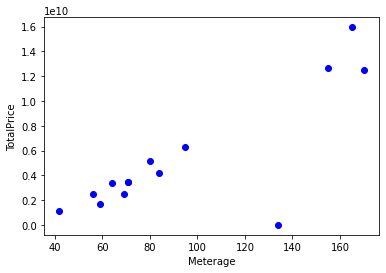

In [8]:
plt.scatter(train.Meterage, train.TotalPrice,  color='blue')
plt.xlabel("Meterage")
plt.ylabel("TotalPrice")
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder
Neighborhood_ = df['Neighborhood']
Neighborhood = Neighborhood_.copy()
le = LabelEncoder()
le.fit(Neighborhood)
Neighborhood = le.transform(Neighborhood)
df['Neighborhood'] = Neighborhood

In [14]:
from sklearn import linear_model

Neighborhood_ = df['Neighborhood']
Neighborhood = Neighborhood_.copy()
le = LabelEncoder()
le.fit(Neighborhood)
Neighborhood = le.transform(Neighborhood)
df['Neighborhood'] = Neighborhood
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Meterage', 'YearConstruction', 'NumberOfRooms','HasElevator','HasParking','HasWarehouse', 'Floor']])
y = np.asanyarray(train[['TotalPrice']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 6.51649665e+07 -1.49209601e+08 -6.58718855e+08  6.30325680e+08
   3.60455732e+09 -2.87399957e+09  1.56073294e+09]]


In [16]:
y_hat= regr.predict(test[['Meterage', 'YearConstruction', 'NumberOfRooms','HasElevator','HasParking','HasWarehouse', 'Floor']])
x = np.asanyarray(test[['Meterage', 'YearConstruction', 'NumberOfRooms','HasElevator','HasParking','HasWarehouse', 'Floor']])
y = np.asanyarray(test[['TotalPrice']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 5314047796741614592.00
Variance score: 0.68


c:\Users\ghafari\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
